# Tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
labels_csv = pd.read_csv('./dog-breed-identification/labels.csv')
labels_csv

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [3]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [4]:
labels_csv.dtypes

id       object
breed    object
dtype: object

In [5]:
labels_csv['breed'].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

<Axes: xlabel='breed'>

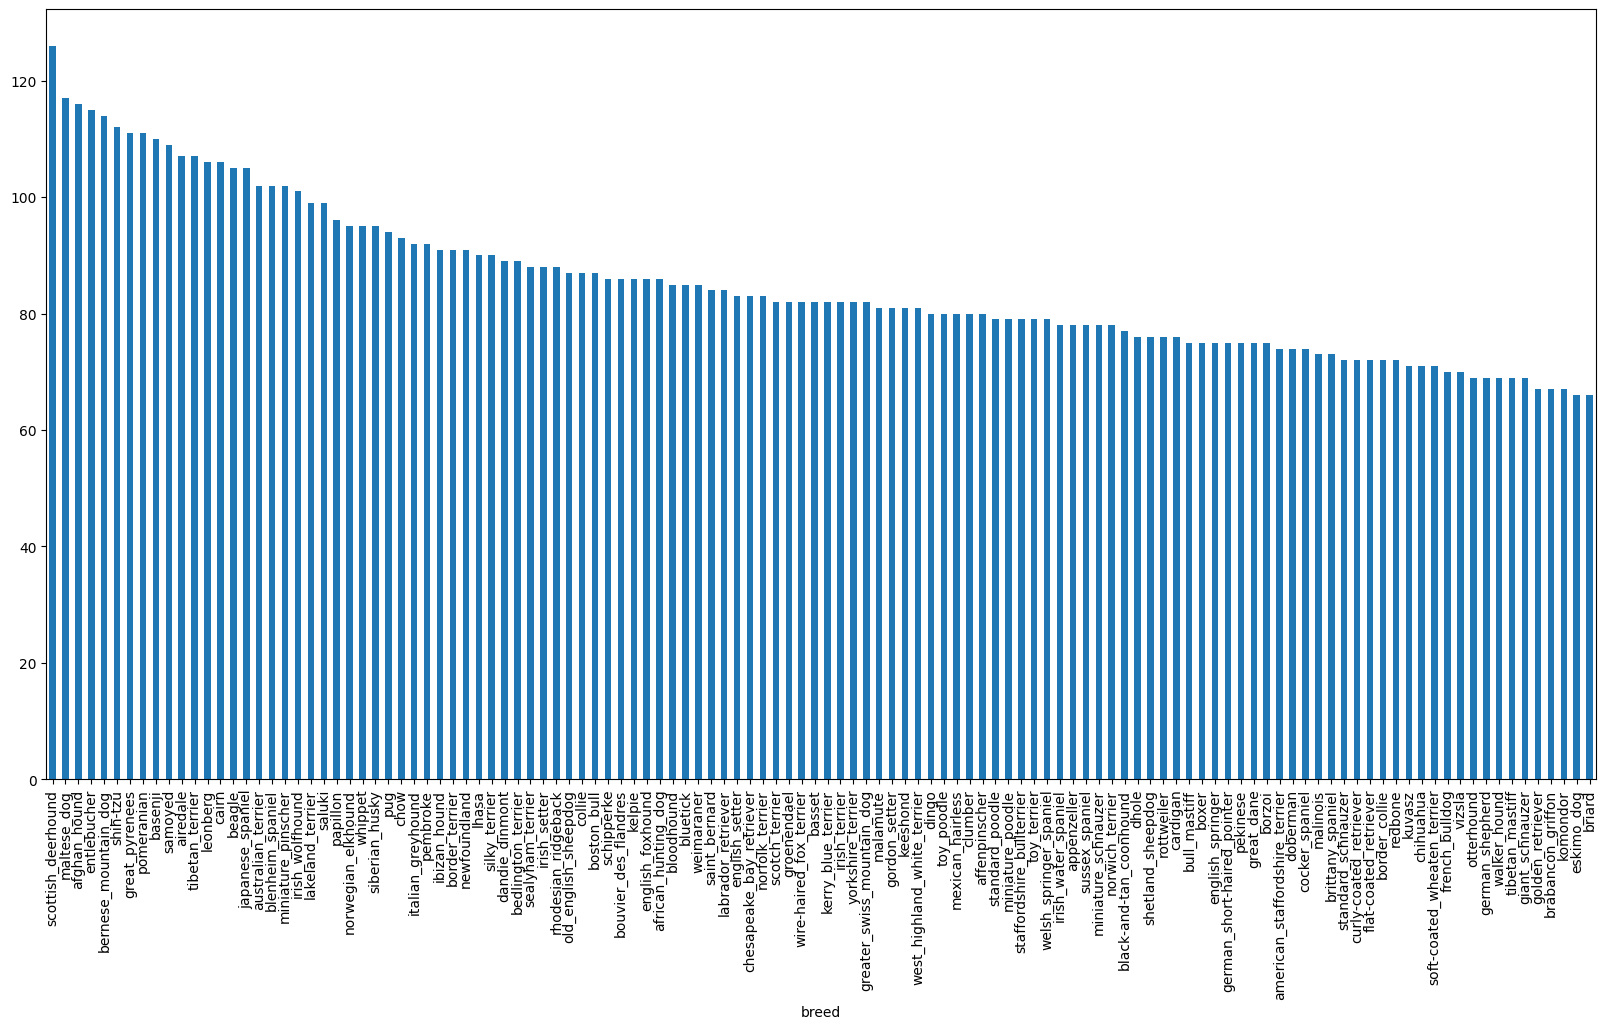

In [6]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10))

In [7]:
labels_csv['breed'].value_counts().median()

82.0

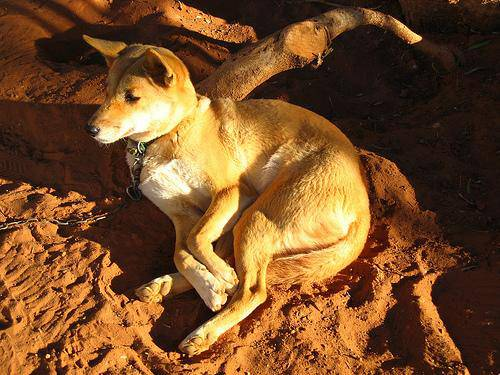

In [8]:
from IPython.display import display, Image
Image('./dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

In [9]:
fileNames = ["./dog-breed-identification/train/"+fname for fname in labels_csv['id']]
fileNames[:10]

['./dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07',
 './dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97',
 './dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397',
 './dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d',
 './dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62',
 './dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d',
 './dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85',
 './dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b',
 './dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9',
 './dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64']

In [10]:
if len(os.listdir('./dog-breed-identification/train/')) == len(fileNames):
    print('Number of file names match number of actual files!')
else:
    print('Number of file names do not match number of actual files.')

Number of file names match number of actual files!


In [11]:
labels_csv['id'][9000]

'e20e32bf114141e20a1af854ca4d0ecc'

In [12]:
labels_csv['breed'][9000]

'tibetan_mastiff'

In [13]:
labels=labels_csv['breed']
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [14]:
len(labels)

10222

In [15]:
if len(labels) == len(fileNames):
    print('Number of labels match number of file names!')
else:
    print('Number of labels do not match number of file names.')

Number of labels match number of file names!


In [16]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [17]:
len(unique_breeds)

120

In [18]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [19]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [20]:
len(boolean_labels)

10222

In [21]:
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [22]:
x = fileNames
y = boolean_labels

In [23]:
len(x), len(y)  

(10222, 10222)

In [24]:
num_images = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [25]:
from sklearn.model_selection import train_test_split

# np.random.seed(42)

x_train, x_val, y_train, y_val = train_test_split(x[:num_images],
                                                    y[:num_images],
                                                    test_size=0.2,
                                                    random_state=42)

len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [26]:
x_train[:5], y_train[:2]

(['./dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de',
  './dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154',
  './dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486',
  './dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3',
  './dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, Fal

In [28]:
# from matplotlib.pyplot import imread
# image = imread(fileNames[42])
# image.shape

In [29]:
import os
print(os.getcwd())

c:\Users\shail sharma\.vscode\Practice_Sem_5\M.L


In [30]:
import os

directory = './dog-breed-identification/train/'
print(os.listdir(directory))

['000bec180eb18c7604dcecc8fe0dba07.jpg', '001513dfcb2ffafc82cccf4d8bbaba97.jpg', '001cdf01b096e06d78e9e5112d419397.jpg', '00214f311d5d2247d5dfe4fe24b2303d.jpg', '0021f9ceb3235effd7fcde7f7538ed62.jpg', '002211c81b498ef88e1b40b9abf84e1d.jpg', '00290d3e1fdd27226ba27a8ce248ce85.jpg', '002a283a315af96eaea0e28e7163b21b.jpg', '003df8b8a8b05244b1d920bb6cf451f9.jpg', '0042188c895a2f14ef64a918ed9c7b64.jpg', '004396df1acd0f1247b740ca2b14616e.jpg', '0067dc3eab0b3c3ef0439477624d85d6.jpg', '00693b8bc2470375cc744a6391d397ec.jpg', '006cc3ddb9dc1bd827479569fcdc52dc.jpg', '0075dc49dab4024d12fafe67074d8a81.jpg', '00792e341f3c6eb33663e415d0715370.jpg', '007b5a16db9d9ff9d7ad39982703e429.jpg', '007b8a07882822475a4ce6581e70b1f8.jpg', '007ff9a78eba2aebb558afea3a51c469.jpg', '008887054b18ba3c7601792b6a453cc3.jpg', '008b1271ed1addaccf93783b39deab45.jpg', '008ba178d6dfc1a583617470d19c1673.jpg', '009509be3ca7cce0ff9e37c8b09b1125.jpg', '0097c6242c6f3071762d9f85c3ef1b2f.jpg', '00a338a92e4e7bf543340dc849230e75.jpg',

In [31]:
file_path = './dog-breed-identification/train/011e06760794850c40f23d6426c40774.jpg'  # Example extension

In [32]:
import os
from matplotlib.pyplot import imread

file_path = './dog-breed-identification/train/011e06760794850c40f23d6426c40774.jpg'  # Ensure extension is included

if os.path.isfile(file_path):
    image = imread(file_path)
    print(image.shape)
else:
    print(f"File not found: {file_path}")

(257, 350, 3)


In [33]:
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [34]:
image.max()

255

In [35]:
image.min()

0

In [36]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [37]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [38]:
IMG_SIZE = 224

def process_image(image_path, img_size=IMG_SIZE):
    """
    Takes an image fiel path and turns the image into a tonsor
    """

    image = tf.io.read.read_file(image_path)

    image = tf.image.decode_jpeg(image,channels=3)

    image = tf.image.convert_image_dtype(image,tf.float32)

    image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

    return image

# 231